# The EPA Carbon Monoxide Dataset

Get the data as a Pandas dataframe 

In [1]:
import pandas as pd
data = pd.read_csv('DATA/epa_co_daily_summary.csv')
data.head(1)

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,aqi,method_code,method_name,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
0,6,73,5,42101,1,33.20265,-117.365925,NAD27,Carbon monoxide,1 HOUR,...,NaN,66.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,Oceanside-Mission Ave,1701 MISSION AVE. OCEANSIDE,California,San Diego,Oceanside,San Diego-Carlsbad CA,2016-04-27


Find missing data items

In [2]:
(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

method_code            50.011581
aqi                    49.988419
local_site_name        27.232437
cbsa_name               2.442745
date_of_last_change     0.000000
date_local              0.000000
county_code             0.000000
site_num                0.000000
parameter_code          0.000000
poc                     0.000000
latitude                0.000000
longitude               0.000000
datum                   0.000000
parameter_name          0.000000
sample_duration         0.000000
pollutant_standard      0.000000
observation_count       0.000000
units_of_measure        0.000000
event_type              0.000000
observation_percent     0.000000
arithmetic_mean         0.000000
first_max_value         0.000000
first_max_hour          0.000000
method_name             0.000000
address                 0.000000
state_name              0.000000
county_name             0.000000
city_name               0.000000
state_code              0.000000
dtype: float64

In [3]:
#delete missing attributes using a function 
def del_data_func(data,columns):
    for column_name in columns: del data[column_name]
del_list = data[['method_code','aqi','local_site_name','cbsa_name','parameter_code',
                 'units_of_measure','parameter_name']]
del_data_func (data, del_list) 

Take a look at the correlations between columns

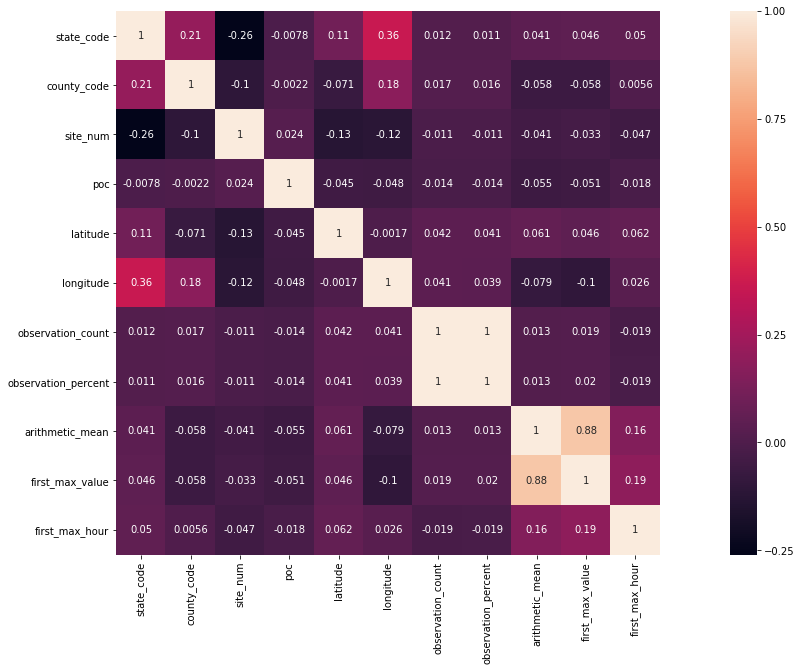

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
#look for correlations
correlation = data.corr(method='pearson')
plt.figure(figsize=(25,10))
sns.heatmap(correlation, vmax=1, square=True,  annot=True ) 
plt.show()

Create a spatial distribution map using matplotlib basemap

/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


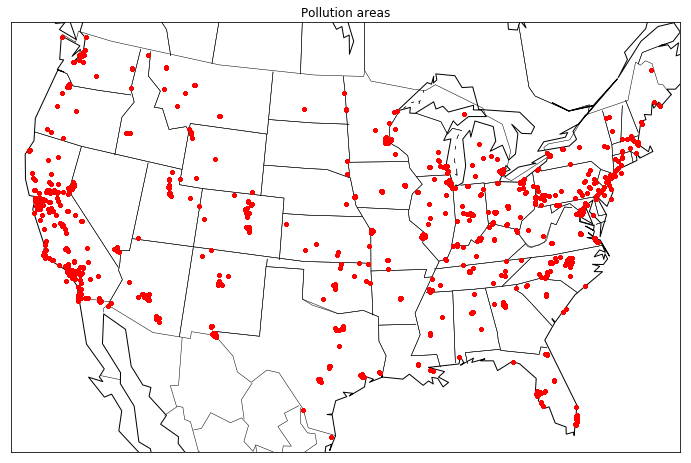

In [8]:
from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
longitudes = data["longitude"].tolist()
latitudes = data["latitude"].tolist()

x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("Pollution areas")
m.plot(x, y, "o", markersize = 3, color = 'red')

m.drawcoastlines()
#m.fillcontinents(color='white',lake_color='aqua')
#m.drawmapboundary()
m.drawstates()
m.drawcountries()
plt.show()    

Take a look at the statistical properties of the data

In [9]:
data.describe()

,state_code,county_code,site_num,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour
count,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06
mean,2.632186e+01,7.857813e+01,7.874244e+02,1.046670e+00,3.766868e+01,-9.778910e+01,2.343853e+01,9.769918e+01,6.760713e-01,1.255508e+00,9.519982e+00
std,1.816040e+01,1.064007e+02,1.647026e+03,3.401031e-01,5.652681e+00,1.925043e+01,1.983194e+00,8.235857e+00,6.149224e-01,1.342174e+00,8.040316e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.593662e+02,1.000000e+00,4.000000e+00,-5.000000e-01,-5.000000e-01,0.000000e+00
25%,6.000000e+00,1.900000e+01,1.000000e+01,1.000000e+00,3.410374e+01,-1.171497e+02,2.400000e+01,1.000000e+02,2.791670e-01,4.000000e-01,1.000000e+00
50%,2.600000e+01,5.500000e+01,3.100000e+01,1.000000e+00,3.861000e+01,-9.442079e+01,2.400000e+01,1.000000e+02,5.041670e-01,9.000000e-01,7.000000e+00
75%,4.100000e+01,9.700000e+01,1.003000e+03,1.000000e+00,4.081259e+01,-8.062205e+01,2.400000e+01,1.000000e+02,8.833330e-01,1.600000e+00,1.700000e+01
max,8.000000e+01,8.100000e+02,9.997000e+03,9.000000e+00,6.484569e+01,0.000000e+00,2.400000e+01,1.000000e+02,4.810000e+01,6.590000e+01,2.300000e+01


Create a map of medium and high pollution areas, using the mean and std

/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


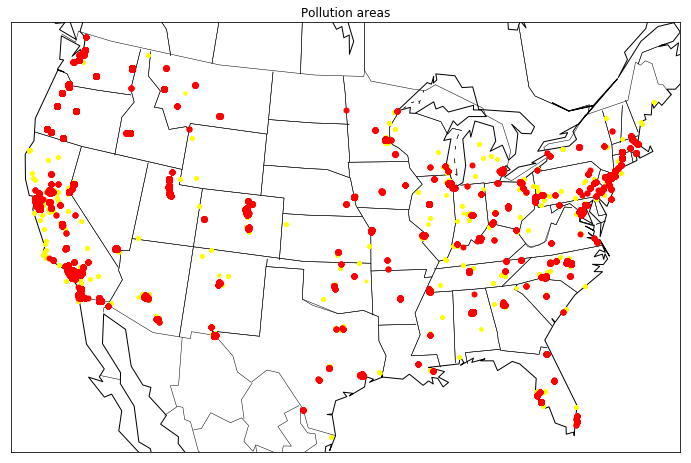

In [10]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

data_m = data[data.arithmetic_mean > 6.760713e-01]
long_m = data_m["longitude"].tolist()
lat_m = data_m["latitude"].tolist()
xm,ym = m(long_m,lat_m)

fig = plt.figure(figsize=(12,10))
plt.title("Pollution areas")
m.plot(xm, ym, "o", markersize = 3, color = 'yellow')

data_h = data[data.arithmetic_mean > 6.760713e-01+4*6.149224e-01]
long_h = data_h["longitude"].tolist()
lat_h = data_h["latitude"].tolist()

xh,yh = m(long_h,lat_h)
m.plot(xh, yh, "o", markersize = 5, color = 'red')


m.drawcoastlines()
#m.fillcontinents(color='white',lake_color='aqua')
#m.drawmapboundary()
m.drawstates()
m.drawcountries()
plt.show()    

What happened over the years? Let's take a look at polluted areas after 2012

/Users/markon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


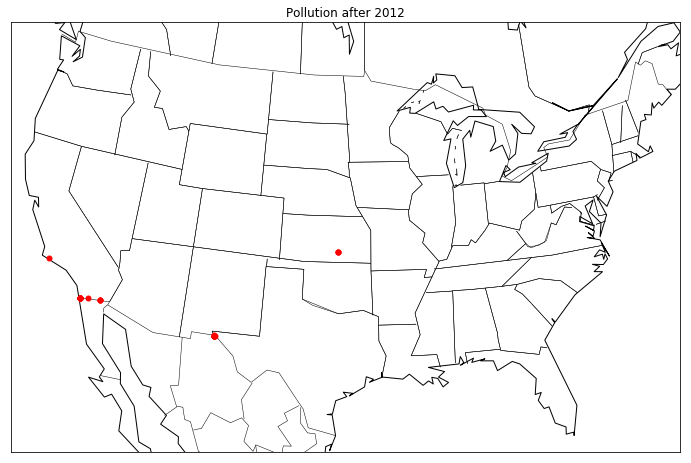

In [11]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

data_h = data[data.arithmetic_mean > 6.760713e-01+4*6.149224e-01][data.date_local > "2012-01-01"]
long_h = data_h["longitude"].tolist()
lat_h = data_h["latitude"].tolist()

fig = plt.figure(figsize=(12,10))
plt.title("Pollution after 2012")

xh,yh = m(long_h,lat_h)
m.plot(xh, yh, "o", markersize = 5, color = 'red')


m.drawcoastlines()
#m.fillcontinents(color='white',lake_color='aqua')
#m.drawmapboundary()
m.drawstates()
m.drawcountries()
plt.show()    

In [32]:
data.arithmetic_mean.describe()

count    8.064820e+06
mean     6.760713e-01
std      6.149224e-01
min     -5.000000e-01
25%      2.791670e-01
50%      5.041670e-01
75%      8.833330e-01
max      4.810000e+01
Name: arithmetic_mean, dtype: float64

Let us now get the data indexed by timestamp

In [12]:
series = pd.read_csv('DATA/epa_co_daily_summary.csv',index_col=11,parse_dates=True)
series.head(1)

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,aqi,method_code,method_name,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
date_local,,,,,,,,,,,,,,,,,,,,,
1994-02-01,6,73,5,42101,1,33.20265,-117.365925,NAD27,Carbon monoxide,1 HOUR,...,NaN,66.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,Oceanside-Mission Ave,1701 MISSION AVE. OCEANSIDE,California,San Diego,Oceanside,San Diego-Carlsbad CA,2016-04-27


In [13]:
ss=series.sort_index()

In [14]:
ss.index[0]

Timestamp('1990-01-01 00:00:00')

In [15]:
ss.index[-1]

Timestamp('2017-05-01 00:00:00')

In [16]:
ss.arithmetic_mean[:10]

date_local
1990-01-01    0.300000
1990-01-01    0.921053
1990-01-01    2.708333
1990-01-01    1.708333
1990-01-01    0.441667
1990-01-01    2.968421
1990-01-01    2.542105
1990-01-01    0.488889
1990-01-01    0.936842
1990-01-01    1.829167
Name: arithmetic_mean, dtype: float64

In [17]:
ss.arithmetic_mean[-10:]

date_local
2017-05-01    0.20
2017-05-01    0.20
2017-05-01    0.40
2017-05-01    0.20
2017-05-01    0.00
2017-05-01    0.75
2017-05-01    0.20
2017-05-01    0.20
2017-05-01    0.10
2017-05-01    0.20
Name: arithmetic_mean, dtype: float64

How many datapoints from 1990?

In [18]:
len(ss['1990'])

332312

In [19]:
ss['1990'].arithmetic_mean.describe()

count    332312.000000
mean          1.125772
std           0.863869
min           0.000000
25%           0.552174
50%           0.941667
75%           1.462500
max          12.120833
Name: arithmetic_mean, dtype: float64

Draw now a map only for 1990

/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


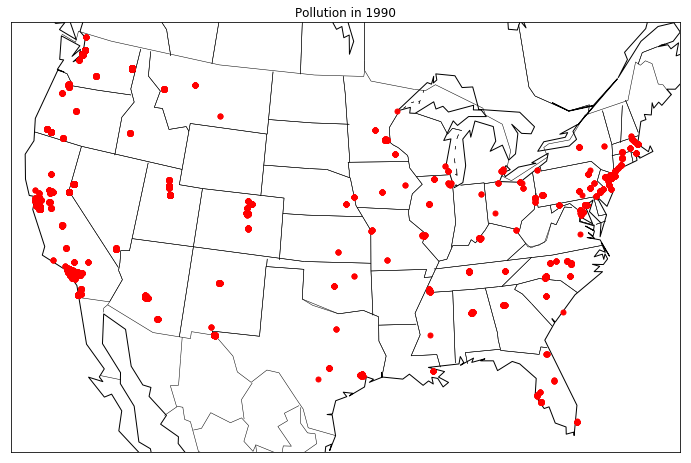

In [20]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

ss1990 = ss['1990']
data_h = ss1990[ss1990.arithmetic_mean > 6.760713e-01+4*6.149224e-01]
long_h = data_h["longitude"].tolist()
lat_h = data_h["latitude"].tolist()

fig = plt.figure(figsize=(12,10))
plt.title("Pollution in 1990")

xh,yh = m(long_h,lat_h)
m.plot(xh, yh, "o", markersize = 5, color = 'red')


m.drawcoastlines()
#m.fillcontinents(color='white',lake_color='aqua')
#m.drawmapboundary()
m.drawstates()
m.drawcountries()
plt.show()    

Define a function for plotting pollution for given years

In [23]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
def yearmap(year):
    fig = Figure()
    canvas = FigureCanvas(fig)
    ax = fig.add_axes([0.1,0.1,0.8,0.8])

    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95,ax=ax)

    ss2016 = ss[str(year)]
    data_h = ss2016[ss2016.arithmetic_mean > 6.760713e-01+4*6.149224e-01]
    long_h = data_h["longitude"].tolist()
    lat_h = data_h["latitude"].tolist()

    fig = plt.figure(figsize=(12,10))
    plt.title("Pollution in %d" % year)

    xh,yh = m(long_h,lat_h)
    m.plot(xh, yh, "o", markersize = 5, color = 'red')


    m.drawcoastlines()
    #m.fillcontinents(color='white',lake_color='aqua')
    #m.drawmapboundary()
    m.drawstates()
    m.drawcountries()
    canvas.print_figure(('WORK/year%04d' % year),dpi=100)



In [25]:
for y in range(1990,2018):
    yearmap(y)
    print(y)

/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008


/Users/markon/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2009
2010
2011
2012
2013
2014
2015
2016
2017


The resulting image files can be combined into an animated GIF:
```
cd WORK
convert year*.png -loop 0 years.gif
```